#### EDA Case Study

**Introduction**

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

**Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specializes in lending various types of loans to urban customers. We will have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

**Data Understanding**

This dataset has 3 files as explained below:

`application_data.csv` contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

`previous_application.csv` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

`columns_description.xlsx` is data dictionary which describes the meaning of the variables.


I have given a link to the data files in a drive folder [here](https://drive.google.com/drive/folders/1YpPjU4Y12MPrMdWaNDa6rS2MNirh2FG3?usp=sharing).  I suggest unzipping them and putting them in your google drive, and link to them directly using colab and its "mount drive" functionality.

In [1]:
#Import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Connect Google Drives to access files directly
from google.colab import drive
drive.mount('/content/drive')

In [27]:
#Load main application data, previous applications, and column data
app_data = pd.read_csv('/content/drive/MyDrive/application_data.csv')
column_data = pd.read_excel('/content/drive/MyDrive/columns_description.xlsx')
prev_app = pd.read_csv('/content/drive/MyDrive/previous_application.csv')

In [31]:
#Initial data inspection to understand structure
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Initial data inspection to understand structure
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Initial data inspection to understand structure
column_data.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [35]:
#Checking specific categorical features
app_data["NAME_FAMILY_STATUS"]

,NAME_FAMILY_STATUS
0,Single / not married
1,Married
2,Single / not married
3,Civil marriage
4,Single / not married
...,...
307506,Separated
307507,Widow
307508,Separated
307509,Married


In [36]:
#Calculate mean of the TARGET (1 = default, 0 = no default) per family status
app_data.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()

,TARGET
NAME_FAMILY_STATUS,
Civil marriage,0.099446
Married,0.075599
Separated,0.081942
Single / not married,0.098077
Unknown,0.000000
Widow,0.058242


In [37]:
#Clean data by removing 'Unknown' and N/A values
filtered_families = app_data[app_data['NAME_FAMILY_STATUS'] != 'Unknown']

Text(0.5, 1.0, 'Family Status vs. Defaults')

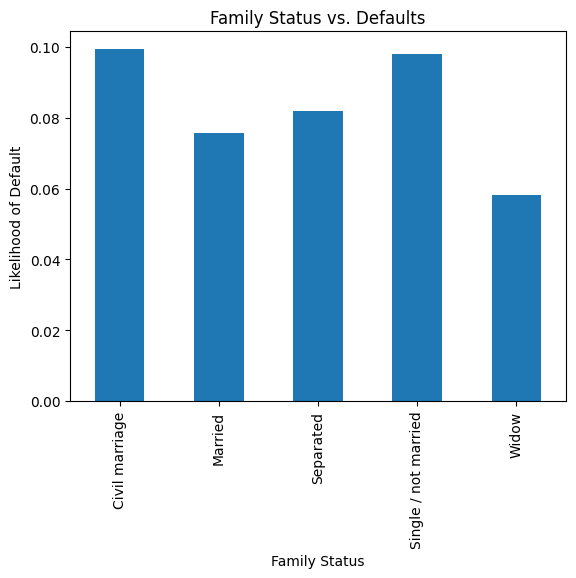

In [38]:
#Visualize findings
filtered_families.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot(xlabel='Family Status', ylabel='Likelihood of Default', kind='bar')
plt.title('Family Status vs. Defaults')

**Findings: Family Status vs. Defaults**

Individuals in Civil marriages or those who are Single/unmarried face the highest likelihood of default, with both groups approaching a 10% rate.

Conversely, Widows exhibit the lowest risk at approximately 6%, while Married individuals show a moderate risk near 7.5%.

Thus, we conclude that family structures involving singlehood or informal partnerships are associated with higher financial default rates compared to traditional marriage or widowhood.

In [16]:
app_data['NAME_HOUSING_TYPE']

,NAME_HOUSING_TYPE
0,House / apartment
1,House / apartment
2,House / apartment
3,House / apartment
4,House / apartment
...,...
307506,With parents
307507,House / apartment
307508,House / apartment
307509,House / apartment


In [39]:
#Group by housing type
app_data.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()

,TARGET
NAME_HOUSING_TYPE,
Co-op apartment,0.079323
House / apartment,0.077957
Municipal apartment,0.085397
Office apartment,0.065724
Rented apartment,0.123131
With parents,0.116981


Text(0.5, 1.0, 'Housing vs. Defaults')

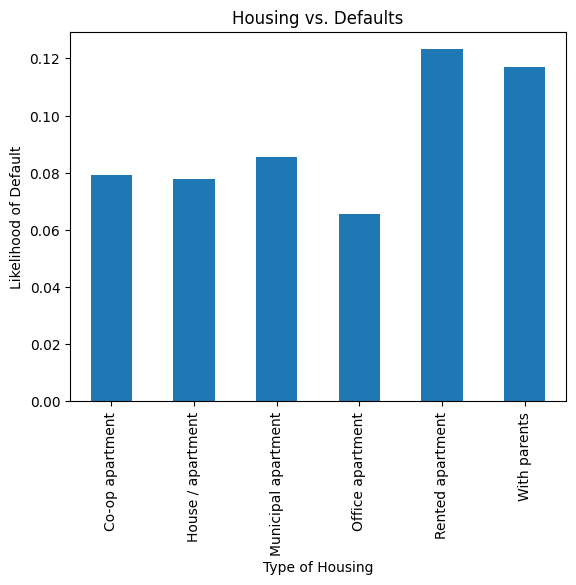

In [40]:
#Visualize findings

app_data.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().plot(xlabel='Type of Housing', ylabel='Likelihood of Default', kind='bar')
plt.title('Housing vs. Defaults')

**Finding: Housing Type vs. Defaults**

Individuals in stable or ownership-oriented housing, such as office or co-op apartments, maintain the lowest default rates (between 6.5% and 8.5%).

There is a significant upward trend in risk for those in rented apartments or living with parents, where the likelihood of default peaks at over 12%.

In [42]:
app_data['NAME_CONTRACT_TYPE']

,NAME_CONTRACT_TYPE
0,Cash loans
1,Cash loans
2,Revolving loans
3,Cash loans
4,Cash loans
...,...
307506,Cash loans
307507,Cash loans
307508,Cash loans
307509,Cash loans


In [43]:
#Group by contract type
app_data.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()

,TARGET
NAME_CONTRACT_TYPE,
Cash loans,0.083459
Revolving loans,0.054783


Text(0.5, 1.0, 'Contracts vs. Defaults')

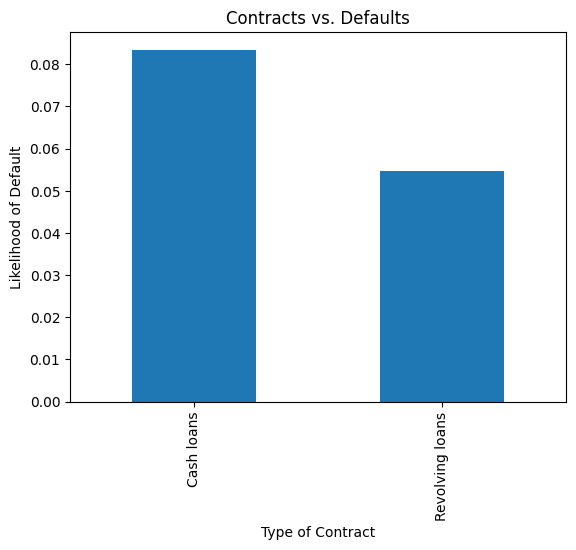

In [44]:
#Visualize findings
app_data.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().plot(xlabel='Type of Contract', ylabel='Likelihood of Default', kind='bar')
plt.title('Contracts vs. Defaults')

**Finding: Contract Type vs. Defaults**

Applicants with Cash loans have a notably higher default risk, with a likelihood of approximately 8.3%.

Conversely, those with Revolving loans demonstrate a significantly lower default rate of roughly 5.5%.

Conclusion: The type of financial contract is a strong indicator of repayment reliability, with revolving credit posing less risk than cash loans in this dataset.

# **Conclusion**

Overalll, the analysis reveals that financial default risk is heavily influenced by indicators of demographic and situational stability. High-risk profiles are most clearly defined by applicants in non-ownership housing (rented or with parents), those in informal or single family structures (civil marriage or single), and those opting for cash loans, with default rates in these categories often exceeding 10% to 12%.

Conversely, indicators of long-term stability correlate with significantly lower default probabilities. These include  being widowed, residing in co-op or office-provided housing, and utilizing revolving credit. The data suggests these factors are strong predictors of repayment reliability.